# Klassifizierung von MNIST
Der Code in diesem Notebook beschäftigt sich mit der Anwendung eines CNNs auf den MNIST-Datensatz.

In [1]:
import numpy as np
from keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay

ERROR! Session/line number was not unique in database. History logging moved to new session 274


### Laden der Daten
Es werden die MNIST-Daten geladen. Sie bestehen aus einem Trainings- und einem Testdatensatz ($60000$ bzw. $10000$ Bilder mit den zugehörigen Klassen).

In [2]:
(x_train, y_train), (x_test, y_test) = load_data()

### Normalisierung der Daten
In diesem Schritt werden die Pixelwerte der Daten normalisiert. Hierzu wird die Formel $$x_{norm}=\frac{x-mean}{x_{max}-x_{min}}$$ verwendet. Außerdem werden die Bilder um eine Dimension vergrößert, weil die Keras-Klassen 3D-Bilder (die dritte Dimension ist Farbe) erwarten.

In [4]:
def scaleBetweenMinus1And1(x):
    mean = np.mean(x)
    maxVal = np.max(x)
    minVal = np.min(x)
    return (x - mean)/(maxVal - minVal)

x_train = scaleBetweenMinus1And1(x_train)
x_test = scaleBetweenMinus1And1(x_test)

x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

### Erstellung des Modells
Das Modell ist simpel gehalten. Es gibt eine Konvolutions-Schicht, die acht $3\times 3$-Kernel auf die Bilder anwendet. Diese wird gefolgt von einer MaxPooling-Schicht mit einem $2\times 2$-Pooling-Kernel. Dann werden die dreidimensionalen Daten zu einem eindimensionalen Vektor entfaltet. Zur Klassifikation wird ein vollständig verbundenes Neuronales Netzwerk verwendet, welches $10$ Knoten besitzt, eine für jede der $10$ möglichen Ziffern, die im Datensatz enthalten sind. Als Aktivierungsfunktion dieser Schicht wird Softmax gewählt.<br>
Nun wird das Modell kompiliert. Dazu gibt es verschiedene Parameter, die für diesen Fall auf den Optimizer &bdquo;Adam&rdquo;, die Loss-Funktion &bdquo;Categorical Crossentropy&rdquo; und die Metrik &bdquo;Genauigkeit&rdquo; gesetzt werden.

In [19]:
x_train = np.squeeze(x_train, (4))
x_test = np.squeeze(x_test, (4))

In [20]:
x_test.shape

(10000, 28, 28, 1)

In [33]:
filter_count = 8
kernel_size = 3
pooling_size = 2

model = Sequential([
    Conv2D(64, (3,3), input_shape=(x_train[0].shape),activation='relu'),
    Conv2D(32, (3,3), activation='relu'),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128,activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

model.compile(
    'adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

### Training des Modells
Im letzten Schritt wird die fit()-Methode des Modells aufgerufen, der die Datensätze übergeben werden. Die Klassen werden hierbei zu einem $10$-dimensionalen Vektor im One-Hot-Encoding umgeformt. Weiter wird die Anzahl der Epochen auf $3$ festgelegt. Das Ergebnis ist eine Genauigkeit von ca. $96,5\%$ auf die Testdaten.

In [ ]:
hist = model.fit(
  x_train,
  to_categorical(y_train),
  epochs=10,
  validation_data=(x_test, to_categorical(y_test)),
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10


13472/60000 [=====>........................] - ETA: 2:08 - loss: 0.3341 - accuracy: 0.8919 ETA: 2:09 - loss:

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\envs\cnn\lib\site-packages\IPython\core\interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-825235f654f6>", line 5, in <module>
    validation_data=(x_test, to_categorical(y_test)),
  File "C:\ProgramData\Anaconda3\envs\cnn\lib\site-packages\tensorflow_core\python\keras\engine\training.py", line 728, in fit
    use_multiprocessing=use_multiprocessing)
  File "C:\ProgramData\Anaconda3\envs\cnn\lib\site-packages\tensorflow_core\python\keras\engine\training_v2.py", line 324, in fit
    total_epochs=epochs)
  File "C:\ProgramData\Anaconda3\envs\cnn\lib\site-packages\tensorflow_core\python\keras\engine\training_v2.py", line 123, in run_one_epoch
    batch_outs = execution_function(iterator)
  File "C:\ProgramData\Anaconda3\envs\cnn\lib\site-packages\tensorflow_core\python\keras\engine\training_v2_utils.py", line 86, in execution_function
    distribute

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\envs\cnn\lib\site-packages\IPython\core\interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-825235f654f6>", line 5, in <module>
    validation_data=(x_test, to_categorical(y_test)),
  File "C:\ProgramData\Anaconda3\envs\cnn\lib\site-packages\tensorflow_core\python\keras\engine\training.py", line 728, in fit
    use_multiprocessing=use_multiprocessing)
  File "C:\ProgramData\Anaconda3\envs\cnn\lib\site-packages\tensorflow_core\python\keras\engine\training_v2.py", line 324, in fit
    total_epochs=epochs)
  File "C:\ProgramData\Anaconda3\envs\cnn\lib\site-packages\tensorflow_core\python\keras\engine\training_v2.py", line 123, in run_one_epoch
    batch_outs = execution_function(iterator)
  File "C:\ProgramData\Anaconda3\envs\cnn\lib\site-packages\tensorflow_core\python\keras\engine\training_v2_utils.py", line 86, in execution_function
    distribute

### One-Hot-Encoding
Es folgt eine kurze Erklärung des One-Hot-Encodings.<br>
In den MNIST-Daten gibt es $10$ Klassen, die Zahlen $0$ bis $9$. Im One-Hot-Encoding werden sie auf einen $10$-dimensionaler Vektor abgebildet (pro Klasse eine Dimension). Es wird der Index der Klasse auf $1$ gesetzt, und die restlichen Indizes auf $0$. Anschaulich steht der Wert an Index $i$ für die Wahrscheinlichkeit, dass der Vektor für Klasse i steht.<br>
Das ist dann sinnvoll, wenn nicht mehr die Ergebnisklassen als Vektor betrachtet werden, sondern der Output des letzten Dense-Layers des CNNs. Dieser spiegelt die Wahrscheinlichkeitsverteilung für die jeweiligen Klassen wider. Das Ziel des CNNs ist es, von den Inputbildern möglichst gut auf die entsprechenden Vektoren zu schließen.
### Code - One-Hot-Encoding
Das folgende Codebeispiel zeigt die Klassen des MNIST-Datensatzes und deren Abbildung im One-Hot-Encoding.

In [6]:
values = np.arange(10)
oneHot = to_categorical(values)
for val, hot in zip(values, oneHot):
    print(f"{val}: {hot}")

0: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
2: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
3: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
4: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
5: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
6: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
7: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
8: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
9: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


4
4


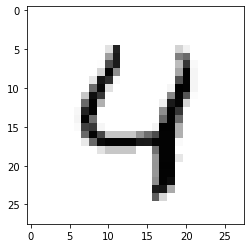

In [6]:
num = 4
plt.imshow(x_test[num], cmap="Greys")
print(np.argmax(model.predict(np.expand_dims(x_test[num], 0))))
print(y_test[num])

In [29]:
import os
model.save("MNIST_Dropout", save_format="tf")

INFO:tensorflow:Assets written to: MNIST_BatchNormAndDropout\assets


INFO:tensorflow:Assets written to: MNIST_BatchNormAndDropout\assets


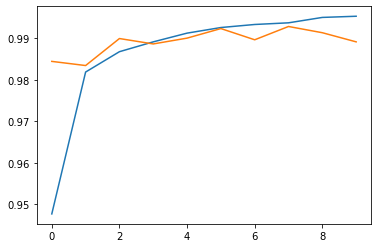

In [32]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

In [ ]:
YPred = [np.argmax(x) for x in model.predict(x_test)]

ERROR! Session/line number was not unique in database. History logging moved to new session 249


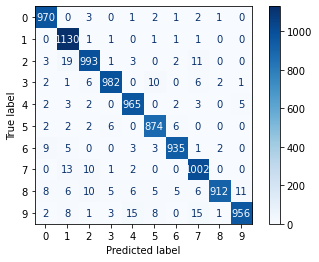

In [17]:
ConfusionMatrixDisplay(confusion_matrix(y_test, YPred)).plot(cmap="Blues")

In [18]:
print(classification_report(y_test, YPred))

ERROR! Session/line number was not unique in database. History logging moved to new session 250
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.95      1.00      0.97      1135
           2       0.97      0.96      0.96      1032
           3       0.98      0.97      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.97      0.98      0.97       892
           6       0.98      0.98      0.98       958
           7       0.96      0.97      0.97      1028
           8       0.99      0.94      0.96       974
           9       0.98      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

